Natural Language Processing
Exercise 1 


In [1]:
# import the libraries for text scratch
import requests
import bs4
from bs4 import BeautifulSoup

# import the libraries for tokenization
import spacy #en
import jieba #zh

# import the libraries for data processing
import re 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from scipy.stats import pearsonr
import numpy as np

In [17]:
# Retrieve text from the webpage of BBC
url_en = "https://www.bbc.com/news/world-australia-67870595"
response_en = requests.get(url_en)
response_en.encoding = 'utf-8'
soup_en=BeautifulSoup(response_en.text)
text_en=soup_en.get_text()

# Check the original text
print(text_en[:1000])

Richard Scolyer: Melanoma doctor's high-stakes gamble to treat his brain cancer - BBC NewsBBC HomepageSkip to contentAccessibility HelpYour accountHomeNewsSportEarthReelWorklifeTravelMore menuMore menuSearch BBCHomeNewsSportEarthReelWorklifeTravelCultureFutureMusicTVWeatherSoundsClose menuBBC NewsMenuHomeIsrael-Gaza warWar in UkraineClimateVideoWorldUKBusinessTechScienceMoreEntertainment & ArtsHealthWorld News TVIn PicturesBBC VerifyNewsbeatWorldAfricaAsiaAustraliaEuropeLatin AmericaMiddle EastUS & CanadaRichard Scolyer: Melanoma doctor's high-stakes gamble to treat his brain cancerPublished1 day agoShareclose panelShare pageCopy linkAbout sharingImage source, Tim Bauer PhotoImage caption, Pathologist Richard Scolyer and oncologist Georgina Long are cancer research pioneersBy Tiffanie TurnbullBBC News, SydneyOn opposite sides of the world, Richard Scolyer and Georgina Long each took one look at a scan and their hearts sank.In front of them was, to the untrained eye, an innocuous-lookin

In [18]:
# Clean the text by matching the main body of the report
match = re.search(r'On(.*)proud.',text_en) 
if match:
    text_en_cleaned = match.group(0)

# Check the cleaned text
print(text_en_cleaned[:1000])

On opposite sides of the world, Richard Scolyer and Georgina Long each took one look at a scan and their hearts sank.In front of them was, to the untrained eye, an innocuous-looking brain.But these long-time friends - both leading skin cancer doctors - feared it held a ticking time bomb. Nestled in the top right corner of Prof Scolyer's skull was a section of matter lighter and cloudier than the rest."I'm no expert in radiology, but… in my heart I knew it was a tumour," he tells the BBC.Neurosurgeons soon confirmed it wasn't just any brain tumour, but "the worst of the worst" - a subtype of glioblastoma so aggressive most patients survive less than a year.Devastated but determined, he and Prof Long set out to do the impossible: to save his life by finding a cure.And it may sound crazy, but the Australian researchers have done it before, with melanoma."It didn't sit right with me… to just accept certain death without trying something," Prof Scolyer says."It's an incurable cancer? Well b

In [4]:
# Lemmatize the text
nlp = spacy.load("en_core_web_sm")
doc_en = nlp(text_en_cleaned)
lemma_list = [token.lemma_ for token in doc_en if not token.is_punct and not token.like_num] # Also filter out the punctuation and numbers

# obtain the count of tokens and types
print(f'The count of lemmas is {len(lemma_list)}.')   
print(f'The count of types is {len(set(lemma_list))}.')    

The count of lemmas is 1604.
The count of types is 585.


In [5]:
# Count the frequency and length of lemmas
lemma_frequency = []
lemma_len = []
lemmas = []

for lemma in set(lemma_list):
    lemma_frequency.append(lemma_list.count(lemma))
    lemma_len.append(len(lemma))
    lemmas.append(lemma) # create a new lemma list without repetition

In [6]:
# Organize the data into a dataframe
df_en = pd.DataFrame({'Lemma':lemmas,'Frequency':lemma_frequency,'Length':lemma_len})
df_en = df_en.sort_values(by=['Frequency'], ascending=False) 

df_en

,Lemma,Frequency,Length
327,be,82,2
291,the,71,3
567,Prof,41,4
360,and,38,3
472,of,37,2
...,...,...,...
226,"miniscule""",1,10
224,similarly,1,9
223,upbeat,1,6
222,prolong,1,7


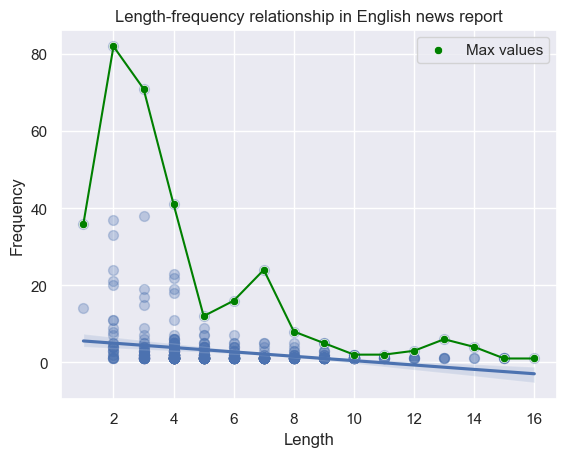

In [7]:
# Visualize the data
sns.regplot(x = df_en['Length'],y = df_en['Frequency'],scatter_kws={'s': 50, 'alpha': 0.3})

# Find the max values of each length of words
max_indices = df_en.groupby('Length')['Frequency'].idxmax()
# Mark the max values in the plot
sns.scatterplot(x=df_en.loc[max_indices, 'Length'], y=df_en.loc[max_indices, 'Frequency'], color='green', label='Max values')
# Connect the plot with line
sns.lineplot(x=df_en.loc[max_indices, 'Length'], y=df_en.loc[max_indices, 'Frequency'], color='green')

plt.title('Length-frequency relationship in English news report')
plt.show()

In [8]:
#Test the significance
x = np.array(lemma_frequency)
y = np.array(lemma_len)

corr_coef, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient:{corr_coef}')
print(f'P-value:{p_value}')

alpha = 0.05
if p_value < alpha:
    print("Exist significant negative correlation.")
else:
    print("The negative correlation is not significant.")

Pearson Correlation Coefficient:-0.24136837200725766
P-value:3.357667578725065e-09
Exist significant negative correlation.


In [9]:
# Retrieve Chinese text from the webpage of The Paper
url_zh = "https://www.thepaper.cn/newsDetail_forward_26250572"
response_zh = requests.get(url_zh)
response_zh.encoding = 'utf-8'
soup_zh=BeautifulSoup(response_zh.text)
text_zh=soup_zh.get_text()

In [10]:
# Check the original text
print(text_zh[:500])

千里运猫重复体检，筹款近300万？三问中国小动物保护协会_澎湃云南_澎湃新闻-The Paper下载客户端登录无障碍+1千里运猫重复体检，筹款近300万？三问中国小动物保护协会朱冠安/央广网北京频道2024-02-03 12:09澎湃云南 >字号“因为我们这次是公益直播，所以关闭了打赏功能，但是大家可以点击屏幕右下角的小蓝心进行公益捐助。”1月29日，中国小动物保护协会在短视频平台直播昆明动物园两只猫体检，引来数万人观看。截至2月1日，该链接所属项目“喂养流浪动物一顿饭”已获得筹款270余万元。一问：千里运猫，必要吗？安全吗？“为何要把两只猫从云南运到北京？”“昆明当地治不了还是没人领养？”“对于这两只长期遭受欺负的猫来说，长途飞行是否有应激风险？”一位爱猫人士表示，长途运输对猫来说很痛苦。在直播间和短视频平台，不少网友对中国小动物保护协会的做法提出疑问。网友留言截图从昆明动物园“猴猫共处”事件被曝光开始，开猫舍的林林就密切关注这几只猫的动向。“最开始很揪心，非常心疼它们的遭遇。刚诱捕它们出猴山时，很担心找不到它们，后来看到它们被妥善安置感觉悬着的心放下了。”不过，这两只猫的后续处置令


In [11]:
# Clean the text by matching the main body of the report
match_zh = re.search(r'因为(.*)回应',text_zh)
if match_zh:
    text_zh_cleaned = match_zh.group(0)

# Check the cleaned text
print(text_zh_cleaned[:500])

因为我们这次是公益直播，所以关闭了打赏功能，但是大家可以点击屏幕右下角的小蓝心进行公益捐助。”1月29日，中国小动物保护协会在短视频平台直播昆明动物园两只猫体检，引来数万人观看。截至2月1日，该链接所属项目“喂养流浪动物一顿饭”已获得筹款270余万元。一问：千里运猫，必要吗？安全吗？“为何要把两只猫从云南运到北京？”“昆明当地治不了还是没人领养？”“对于这两只长期遭受欺负的猫来说，长途飞行是否有应激风险？”一位爱猫人士表示，长途运输对猫来说很痛苦。在直播间和短视频平台，不少网友对中国小动物保护协会的做法提出疑问。网友留言截图从昆明动物园“猴猫共处”事件被曝光开始，开猫舍的林林就密切关注这几只猫的动向。“最开始很揪心，非常心疼它们的遭遇。刚诱捕它们出猴山时，很担心找不到它们，后来看到它们被妥善安置感觉悬着的心放下了。”不过，这两只猫的后续处置令林林不解，“我原本以为会在当地妥善安置，这对猫来说是最好的选择，不理解为什么运到了北京。”据了解，“猴猫共处”事件引发社会关注后，中国小动物保护协会介入此事，与昆明动物园达成了接管两只猫的共识。1月28日，中国小动物保护协会将两只猫运送至北京，并在


In [12]:
# Tokenize the text with jieba
token_list = jieba.lcut_for_search(text_zh_cleaned)

# Filter out the punctuation and numbers
punct = ['。','，','、','：','；','“','”','‘','’','%','（','）','《','》','？','！']
for token in token_list[0:]:
    if token in punct:
        token_list.remove(token)
    if token.isdigit() or "." in token:
        token_list.remove(token)

print(f'The count of tokens is {len(token_list)}.')   

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/lx/4fxgm7dx5pz97z2m70cz51dw0000gn/T/jieba.cache
Loading model cost 0.854 seconds.
Prefix dict has been built successfully.


The count of tokens is 1418.


In [13]:
# Count token frequency and token length
token_frequency = []
token_len = []
tokens = []
for token in set(token_list):
    token_frequency.append(token_list.count(token)) # count the frequency
    token_len.append(len(token)) # count the length
    tokens.append(token) # create a new list of token without repetition

In [14]:
# Convert the data into a table
df_zh = pd.DataFrame({'Token':tokens,'Frequency':token_frequency,'Length':token_len})
df_zh = df_zh.sort_values(by=['Frequency'], ascending=False) # arrange the order according to the frequency
df_zh

,Token,Frequency,Length
195,的,51,1
412,动物,33,2
139,在,26,1
347,协会,23,2
334,猫,22,1
...,...,...,...
230,钱能,1,2
229,不解,1,2
228,事务所,1,3
227,证明,1,2


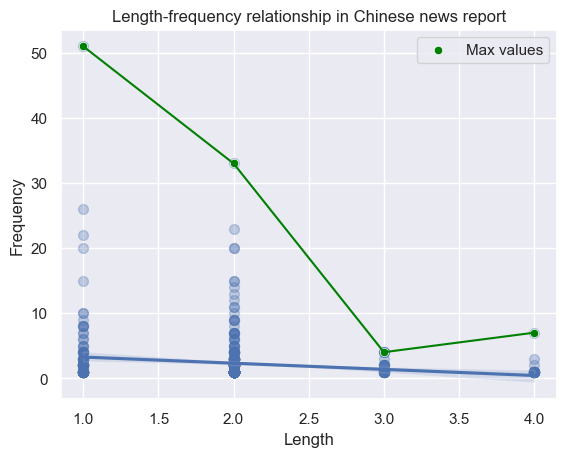

In [15]:
# Visualize the data
sns.regplot(x = df_zh['Length'],y = df_zh['Frequency'],scatter_kws={'s': 50, 'alpha': 0.3})

# Find the max values of each length of words
max_indices = df_zh.groupby('Length')['Frequency'].idxmax()
# Mark the max values in the plot
sns.scatterplot(x=df_zh.loc[max_indices, 'Length'], y=df_zh.loc[max_indices, 'Frequency'], color='green', label='Max values')
# Connect the plot with line
sns.lineplot(x=df_zh.loc[max_indices, 'Length'], y=df_zh.loc[max_indices, 'Frequency'], color='green')

plt.title('Length-frequency relationship in Chinese news report')
plt.show()

In [16]:
#Test the significance
x = np.array(token_frequency)
y = np.array(token_len)

corr_coef, p_value = pearsonr(x, y)

print(f'Pearson Correlation Coefficient:{corr_coef}')
print(f'P-value:{p_value}')

alpha = 0.05
if p_value < alpha:
    print("Exist significant negative correlation.")
else:
    print("The negative correlation is not significant.")

Pearson Correlation Coefficient:-0.1603042431605946
P-value:7.178318402912754e-05
Exist significant negative correlation.
